## **Three observable trends based on data**

**1.** The cities with lattitude closer to the the equator (0 degrees) have higher temperatures that decrease the further away from the equator they get.

**2.** Humidity does not appear to be impacted by the distance from the equator.

**3.** Southern cities appear to have higher wind speeds. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
units="imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}appid={api_key}&units={units}&q="


## **Show JSON dict/define variable**

In [4]:
#json is a dict
response_json = requests.get(query_url+city).json()
response_json

{'coord': {'lon': 74.49, 'lat': 15.34},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 70.73,
  'pressure': 958.75,
  'humidity': 99,
  'temp_min': 70.73,
  'temp_max': 70.73,
  'sea_level': 1023.75,
  'grnd_level': 958.75},
 'wind': {'speed': 5.73, 'deg': 237.004},
 'rain': {'3h': 0.845},
 'clouds': {'all': 76},
 'dt': 1535948473,
 'sys': {'message': 0.0035,
  'country': 'IN',
  'sunrise': 1535935780,
  'sunset': 1535980378},
 'id': 1273574,
 'name': 'Vaini',
 'cod': 200}

## **Loop through cities list and add to dict. Skip error cities**


In [5]:
citiesWeather=[]

count=0
for city in cities:
    count = count + 1
    #print(query_url+city)
    city_url=query_url+city
    city_weather = requests.get(city_url).json()
    
    try:
        print('----')
        print(count)
        print(city)

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        city_weather = {"Lat"       : city_lat,
                        "Lng"       : city_lng,
                        "Temp"  : city_temp,
                        "Humidity"  : city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind}
        
        citiesWeather.append(city_weather)
        
    # If an error is experienced, skip the city
    except:
        print('-----')
        print("Skipping... City Not found...")
        pass


----
1
port elizabeth
----
2
bouza
----
3
barentsburg
-----
Skipping... City Not found...
----
4
adrar
----
5
mataura
----
6
hobart
----
7
ushuaia
----
8
qianan
----
9
ponta do sol
----
10
toliary
-----
Skipping... City Not found...
----
11
san quintin
----
12
guatire
----
13
puerto escondido
----
14
cape town
----
15
albany
----
16
andenes
-----
Skipping... City Not found...
----
17
chokurdakh
----
18
baoying
----
19
yellowknife
----
20
mount vernon
----
21
jamestown
----
22
aasiaat
----
23
hermanus
----
24
lolua
-----
Skipping... City Not found...
----
25
emerald
----
26
narsaq
----
27
khatanga
----
28
kapaa
----
29
longyearbyen
----
30
punta arenas
----
31
fernley
----
32
torbay
----
33
pevek
----
34
bluff
----
35
antofagasta
----
36
samusu
-----
Skipping... City Not found...
----
37
amahai
----
38
hilo
----
39
copiapo
----
40
esperance
----
41
taolanaro
-----
Skipping... City Not found...
----
42
utiroa
-----
Skipping... City Not found...
----
43
berdigestyakh
----
44
atuona
----
4

----
391
mount isa
----
392
coruripe
----
393
torit
-----
Skipping... City Not found...
----
394
pangkalanbuun
----
395
trairi
----
396
kalmunai
----
397
artyk
-----
Skipping... City Not found...
----
398
padang
----
399
portland
----
400
pitimbu
----
401
xichang
----
402
balikpapan
----
403
almaty
----
404
roros
----
405
tingo maria
----
406
poum
----
407
bairiki
-----
Skipping... City Not found...
----
408
luwuk
----
409
samarai
----
410
shar
----
411
palabuhanratu
-----
Skipping... City Not found...
----
412
airai
----
413
satitoa
-----
Skipping... City Not found...
----
414
maceio
----
415
grong
----
416
tuktoyaktuk
----
417
dondo
----
418
concordia
----
419
pervomayskoye
----
420
cockburn town
----
421
grand-lahou
----
422
sungairaya
----
423
general cepeda
----
424
bathsheba
----
425
karauzyak
-----
Skipping... City Not found...
----
426
umea
----
427
kismayo
-----
Skipping... City Not found...
----
428
ambovombe
----
429
chulym
----
430
dragesti
----
431
manturovo
----
432
mount

## **Check dict values**

In [6]:
citiesWeather[1]

{'Lat': 14.42,
 'Lng': 6.04,
 'Temp': 69.65,
 'Humidity': 95,
 'Cloudiness': 8,
 'Wind Speed': 3.04}

## **Create Dataframe**

In [7]:
weather_df=pd.DataFrame(citiesWeather)
weather_df.head()

,Cloudiness,Humidity,Lat,Lng,Temp,Wind Speed
0,75,97,39.31,-74.98,76.75,8.41
1,8,95,14.42,6.04,69.65,3.04
2,0,23,27.87,-0.29,86.00,9.17
3,92,81,-46.19,168.86,48.68,11.32
4,40,63,-42.88,147.33,55.40,5.82


## **Save output to csv**

In [14]:
weather_df.to_csv("WeatherPy Data Retrival.csv")

## **Show max/min values for each column for graph parameters**

In [9]:
max_vals=weather_df.max(axis=0)
min_vals=weather_df.min(axis=0)

print("Minimum Values")
print(min_vals)
print("-----")
print("Maximum Values")
print(max_vals)


Minimum Values
Cloudiness      0.00
Humidity        3.00
Lat           -54.81
Lng          -179.17
Temp           28.16
Wind Speed      0.13
dtype: float64
-----
Maximum Values
Cloudiness    100.00
Humidity      100.00
Lat            78.22
Lng           178.42
Temp           96.80
Wind Speed     47.20
dtype: float64


## **Temperature (F) vs. Latitude**


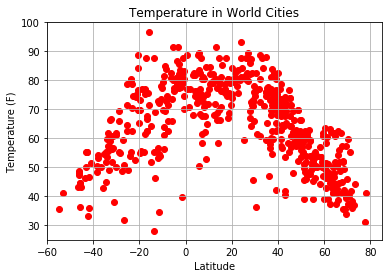

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Temp"], c="red", marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(25,100)
plt.xlim(-60, 85)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## **Humidity (%) vs. Latitude**

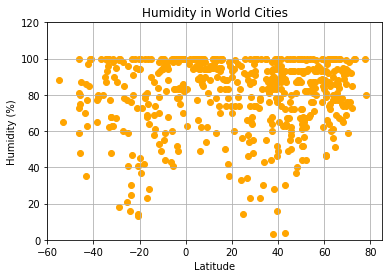

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c="orange", marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,120)
plt.xlim(-60, 85)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## **Cloudiness (%) vs. Latitude**

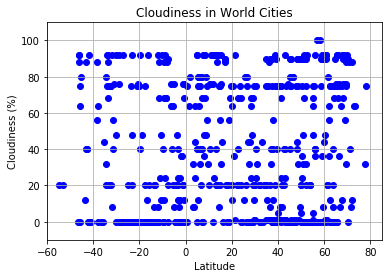

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c="blue", marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-10,110)
plt.xlim(-60, 85)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## **Wind Speed (mph) vs. Latitude**

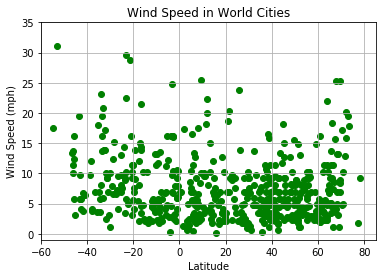

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], c="green", marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-1,35)
plt.xlim(-60, 85)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()
